In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from fastai.collab import *
from fastai.tabular import *

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/hackaton/pupil_info.csv', sep=';') 

In [ ]:
 data.drop(columns='Unnamed: 0', inplace=True)
data.columns = ['name', 'userID', 'state', 'age', 'sex']

In [ ]:
names = {v: i for i, v in enumerate(data['name'].unique())}


In [ ]:
data['nameID'] = data['name'].map(names)

In [ ]:
data_hobbies = data[data['name'].notna()][['userID','nameID','name',
'state','age','sex']] 

In [ ]:
data_hobbies.head() 

,userID,nameID,name,state,age,sex
4433,1603634.0,1,Правила дорожного движения,1.0,9.0,Женский
4434,1257456.0,1,Правила дорожного движения,1.0,17.0,Мужской
4435,1262813.0,2,Военно-историческая реконструкция,1.0,37.0,Мужской
4436,1262783.0,2,Военно-историческая реконструкция,1.0,37.0,Мужской
4437,1262818.0,2,Военно-историческая реконструкция,1.0,40.0,Мужской


In [ ]:
data = CollabDataBunch.from_df(data_hobbies, seed=42, valid_pct=0.1, item_name='nameID')

In [ ]:
data.show_batch()

userID,nameID,target
500867.0,315,1.0
610874.0,322,1.0
681177.0,311,1.0
1427378.0,311,1.0
1264854.0,111,1.0


In [ ]:
y_range = [0,1.0]


In [ ]:
learn = collab_learner(data, n_factors=40, y_range=y_range, loss_func = mse) 


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


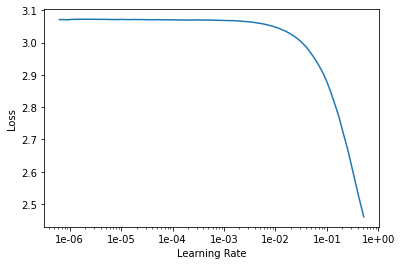

In [ ]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [ ]:
lr_min=1e-2

In [ ]:
learn.fit_one_cycle(5, lr_min)

epoch,train_loss,valid_loss,time
0,0.094032,0.048162,00:17
1,0.022044,0.022001,00:17
2,0.012933,0.013254,00:17
3,0.005142,0.010139,00:17
4,0.002477,0.009632,00:16


In [ ]:
lr_min = lr_min/10

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_min)

epoch,train_loss,valid_loss,time
0,0.001754,0.009201,00:17
1,0.001097,0.008941,00:17


In [ ]:
learn.save('dotprod')


In [ ]:
learn.load('dotprod');


In [ ]:
g = data_hobbies.groupby('nameID')['state'].count()
g.sort_values(ascending=False)[:1000]

nameID
92     22341
39     13527
122    11002
143     6758
86      6470
       ...  
364        1
76         1
368        1
370        1
373        1
Name: state, Length: 373, dtype: int64

In [ ]:
learn.show_results

<bound method Learner.show_results of CollabLearner(data=TabularDataBunch;

Train: LabelList (173663 items)
x: CollabList
userID 1603634.0; nameID 1; ,userID 1257456.0; nameID 1; ,userID 1262813.0; nameID 2; ,userID 1262783.0; nameID 2; ,userID 1262818.0; nameID 2; 
y: FloatList
1.0,1.0,1.0,1.0,1.0
Path: .;

Valid: LabelList (19295 items)
x: CollabList
userID #na#; nameID 55; ,userID #na#; nameID 92; ,userID 825317.0; nameID 101; ,userID #na#; nameID 39; ,userID #na#; nameID 322; 
y: FloatList
1.0,1.0,1.0,1.0,1.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(145149, 40)
  (i_weight): Embedding(373, 40)
  (u_bias): Embedding(145149, 1)
  (i_bias): Embedding(373, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=<function mean_squared_error at 0x7fd58f09f2f0>, metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train